In [1]:
import numpy as np
import pandas as pd

**Loading the dataset**

In [2]:
data= pd.read_csv("/content/SampleSuperstore.csv", encoding='windows-1254')

In [3]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
data.shape

(9994, 13)

In [5]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
data.shape

(9994, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
data.corr()

<ipython-input-9-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [10]:
import plotly.express as px
fig = px.imshow(data.corr(),text_auto=True)
fig.show()


<ipython-input-10-5d18cc60c805>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fig = px.imshow(data.corr(),text_auto=True)


In [11]:
cities_profit=pd.DataFrame(data.groupby("City")["Profit"].sum())
cities_profit.reset_index(inplace=True)

cities_profit=cities_profit.sort_values(by="Profit",ascending=False)
cities_profit.head(10)

,City,Profit
329,New York City,62036.9837
266,Los Angeles,30440.7579
452,Seattle,29156.0967
438,San Francisco,17507.3854
123,Detroit,13181.7908
233,Lafayette,10018.3876
215,Jackson,7581.6828
21,Atlanta,6993.6629
300,Minneapolis,6824.5846
437,San Diego,6377.1960


**Profit by State**

In [12]:
state_profit=pd.DataFrame(data.groupby("State")["Profit"].sum())
state_profit.reset_index(inplace=True)

state_profit=state_profit.sort_values(by="Profit",ascending=False)
state_profit.head(10)

,State,Profit
3,California,76381.3871
30,New York,74038.5486
45,Washington,33402.6517
20,Michigan,24463.1876
44,Virginia,18597.9504
12,Indiana,18382.9363
9,Georgia,16250.0433
15,Kentucky,11199.6966
21,Minnesota,10823.1874
6,Delaware,9977.3748


**Profit by sub-category**

In [13]:
data["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [14]:
sub_categories_info=pd.DataFrame(data.groupby("Sub-Category")["Profit"].sum())
sub_categories_info.reset_index(inplace=True)
sub_categories_profit=sub_categories_info.sort_values(by="Profit",ascending=False)
sub_categories_profit.head(10)

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


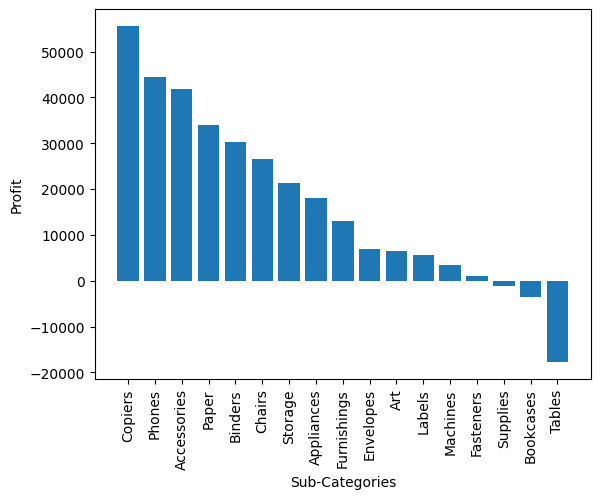

In [15]:
import matplotlib.pyplot as plt
plt.bar(sub_categories_profit["Sub-Category"],sub_categories_profit["Profit"])
plt.xticks(sub_categories_profit['Sub-Category'] , rotation = "vertical")
plt.xlabel("Sub-Categories")
plt.ylabel("Profit")
plt.show()

**Sales by category**

In [16]:
data["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [17]:
categories_sales=data.groupby("Category").sum()
categories_sales.reset_index(inplace=True)
categories_sales.head(10)

<ipython-input-17-2976f1754e43>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Category,Postal Code,Sales,Quantity,Discount,Profit
0,Furniture,118196026,741999.7953,8028,368.89,18451.2728
1,Office Supplies,330772872,719047.0320,22906,947.80,122490.8008
2,Technology,102603754,836154.0330,6939,244.40,145454.9481


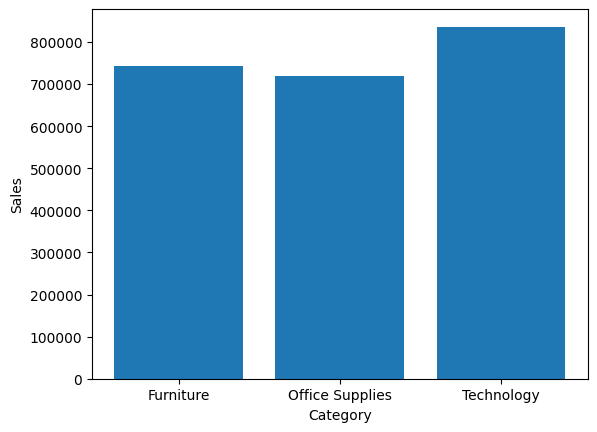

In [18]:
plt.bar(categories_sales["Category"], categories_sales['Sales'])
plt.xticks(categories_sales.index)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

**Popular Sub-category**

In [19]:
popular_sub_category=pd.DataFrame(data.groupby("Sub-Category")["Quantity"].sum())
popular_sub_category.reset_index(inplace=True)
popular_sub_category=popular_sub_category.sort_values(by="Quantity",ascending=False)

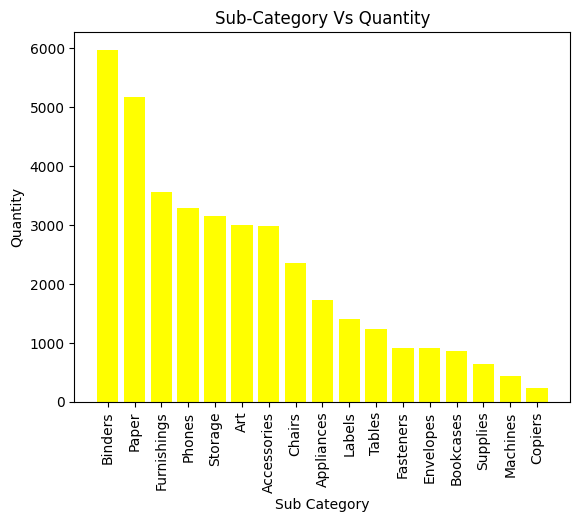

In [20]:
plt.bar(popular_sub_category["Sub-Category"],popular_sub_category["Quantity"],color="yellow")
plt.xticks(popular_sub_category["Sub-Category"],rotation="vertical")
plt.title("Sub-Category Vs Quantity")
plt.xlabel("Sub Category")
plt.ylabel("Quantity")
plt.show()

**Profit by Customer Segment**

In [21]:
customer_segment=data.groupby("Segment").sum()
customer_segment.reset_index(inplace=True)
customer_segment

<ipython-input-21-a6e312099802>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Segment,Postal Code,Sales,Quantity,Discount,Profit
0,Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
1,Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
2,Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


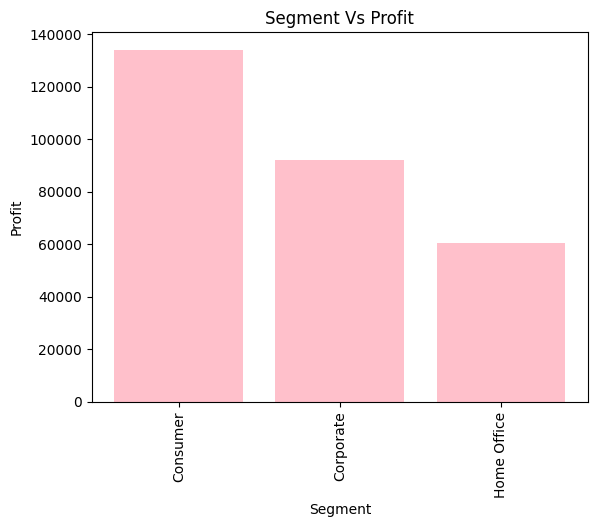

In [22]:
plt.bar(customer_segment["Segment"],customer_segment["Profit"],color="pink")
plt.xticks(customer_segment["Segment"],rotation="vertical")
plt.title("Segment Vs Profit")
plt.xlabel("Segment")
plt.ylabel("Profit")
plt.show()

**Profit By Region**

In [23]:
data["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [24]:
profitable_region=pd.DataFrame(data.groupby("Region")["Profit"].sum())
profitable_region.reset_index(inplace=True)
profitable_region

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


**Sales by City**

In [25]:
city_volume = pd.DataFrame(data.groupby('City')['Sales'].sum())
city_volume =city_volume.sort_values(by="Sales",ascending=False)
city_volume.head()

,Sales
City,
New York City,256368.161
Los Angeles,175851.341
Seattle,119540.742
San Francisco,112669.092
Philadelphia,109077.013


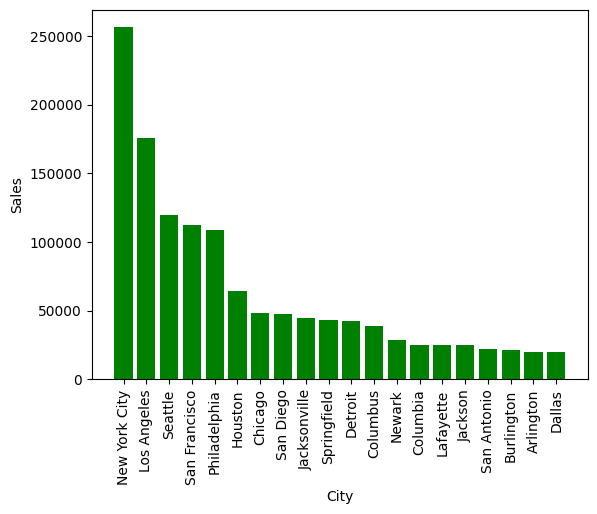

In [26]:
plt.bar(city_volume.index[0:20], city_volume['Sales'][0:20],color="green")
plt.xticks(city_volume.index[0:20],rotation = 'vertical')
plt.xlabel("City" )
plt.ylabel("Sales")
plt.show()

## **Building Machine Learning Model to predict the profit**

In [27]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [28]:
dataset1=data.drop(columns=["Country","City","State","Sub-Category","Postal Code"])
dataset1.head()

,Ship Mode,Segment,Region,Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,South,Furniture,261.9600,2,0.00,41.9136
1,Second Class,Consumer,South,Furniture,731.9400,3,0.00,219.5820
2,Second Class,Corporate,West,Office Supplies,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,South,Furniture,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,South,Office Supplies,22.3680,2,0.20,2.5164


In [29]:
dataset1["Ship Mode"].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [30]:
dataset1["Segment"].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [31]:
dataset1["Category"].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [32]:
dataset1["Region"].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

**Converting categorical variable into numerical value**

In [33]:
dataset1.replace({"Ship Mode":{"Standard Class":0,"Second Class":1,"First Class":2,"Same Day":3},"Segment":{"Consumer":0,"Corporate":1,"Home Office":2},
                 "Category":{"Office Supplies":0,"Furniture":1,"Technology":2},"Region":{"West":0,"East":1,"Central":2,"South":3}},inplace=True)

In [34]:
dataset1.head()

,Ship Mode,Segment,Region,Category,Sales,Quantity,Discount,Profit
0,1,0,3,1,261.9600,2,0.00,41.9136
1,1,0,3,1,731.9400,3,0.00,219.5820
2,1,1,0,0,14.6200,2,0.00,6.8714
3,0,0,3,1,957.5775,5,0.45,-383.0310
4,0,0,3,0,22.3680,2,0.20,2.5164


**Separating the dataset into x and y**

In [35]:
x=dataset1.iloc[:,:-1]
print(x)

      Ship Mode  Segment  Region  Category     Sales  Quantity  Discount
0             1        0       3         1  261.9600         2      0.00
1             1        0       3         1  731.9400         3      0.00
2             1        1       0         0   14.6200         2      0.00
3             0        0       3         1  957.5775         5      0.45
4             0        0       3         0   22.3680         2      0.20
...         ...      ...     ...       ...       ...       ...       ...
9989          1        0       3         1   25.2480         3      0.20
9990          0        0       0         1   91.9600         2      0.00
9991          0        0       0         2  258.5760         2      0.20
9992          0        0       0         0   29.6000         4      0.00
9993          1        0       0         0  243.1600         2      0.00

[9994 rows x 7 columns]


In [36]:
y=dataset1.iloc[:,-1]
print(y)

0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9994, dtype: float64


**Rescaling the Features**

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()


In [38]:
num_vars=["Sales","Quantity"]
x[num_vars]=scaler.fit_transform(x[num_vars])
print(x)

      Ship Mode  Segment  Region  Category     Sales  Quantity  Discount
0             1        0       3         1  0.011552  0.076923      0.00
1             1        0       3         1  0.032313  0.153846      0.00
2             1        1       0         0  0.000626  0.076923      0.00
3             0        0       3         1  0.042280  0.307692      0.45
4             0        0       3         0  0.000968  0.076923      0.20
...         ...      ...     ...       ...       ...       ...       ...
9989          1        0       3         1  0.001096  0.153846      0.20
9990          0        0       0         1  0.004043  0.076923      0.00
9991          0        0       0         2  0.011403  0.076923      0.20
9992          0        0       0         0  0.001288  0.230769      0.00
9993          1        0       0         0  0.010722  0.076923      0.00

[9994 rows x 7 columns]


**Splitting the dataset in training and testing**

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=100)

In [40]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(7495, 7) (2499, 7) (7495,) (2499,)


**Creating Machine Learning Model**

In [41]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=0,n_estimators=117)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=117, random_state=0)

**Predicting the test data**

In [42]:
y_pred=model.predict(x_test)

In [43]:
from sklearn.metrics import r2_score
print("R2 Score=",r2_score(y_pred,y_test)*100)

R2 Score= 74.08625172960967


Text(0, 0.5, 'Y_pred')

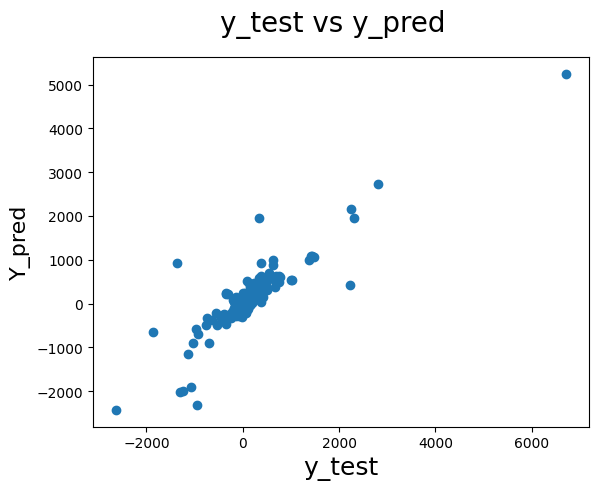

In [44]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('Y_pred', fontsize=16)